# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão, variância pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw1 = sinasc_raw.copy()
sinasc_raw1.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [5]:
sinasc_raw1['munResLat'].min()

-13.49976

In [6]:
sinasc_raw1['munResLat'].max()

-8.76889

In [7]:
faixa_lat = pd.cut(sinasc_raw1['munResLat'], [-13.49976, -10.5, -8.76889])

sinasc_raw1.pivot_table(values='APGAR5',
                        index=['ESTCIVMAE', faixa_lat],
                        columns=['RACACORMAE'],
                        aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                        dropna=True)

sum                                      mean  \
RACACORMAE                     1.0     2.0    3.0      4.0     5.0       1.0   
ESTCIVMAE munResLat                                                            
1.0       (-13.5, -10.5]    7469.0  1313.0  122.0  25039.0  1806.0  9.108537   
          (-10.5, -8.769]   4879.0  1158.0   72.0  37313.0   333.0  9.346743   
2.0       (-13.5, -10.5]   15249.0  1748.0  325.0  29706.0   441.0  9.253034   
          (-10.5, -8.769]   9121.0  1212.0  185.0  30699.0    37.0  9.393409   
3.0       (-13.5, -10.5]      63.0     0.0    0.0    177.0     0.0  9.000000   
          (-10.5, -8.769]     63.0     9.0    0.0    194.0     0.0  9.000000   
4.0       (-13.5, -10.5]     699.0    55.0    0.0   1565.0    10.0  9.077922   
          (-10.5, -8.769]    305.0    36.0    9.0   1291.0     0.0  9.242424   
5.0       (-13.5, -10.5]    6263.0  1264.0   76.0  19829.0   819.0  9.196769   
          (-10.5, -8.769]   4699.0  1050.0  252.0  30223.0   158.0  9.323413   
9.0       (-13.5, -10.5]     157.0    19.0    0.0    449.0     9.0  9.235294   
          (-10.5, -8.769]     84.0    19.0    0.0    454.0     0.0  9.333333   

                                                                    ...  \
RACACORMAE                      2.0       3.0       4.0        5.0  ...   
ESTCIVMAE munResLat                                                 ...   
1.0       (-13.5, -10.5]   9.181818  9.384615  9.078680   9.214286  ...   
          (-10.5, -8.769]  9.190476  9.000000  9.100732   9.000000  ...   
2.0       (-13.5, -10.5]   9.056995  9.285714  9.140308   9.187500  ...   
          (-10.5, -8.769]  9.323077  8.809524  9.230006   9.250000  ...   
3.0       (-13.5, -10.5]        NaN       NaN  9.315789        NaN  ...   
          (-10.5, -8.769]  9.000000       NaN  9.238095        NaN  ...   
4.0       (-13.5, -10.5]   9.166667       NaN  9.152047  10.000000  ...   
          (-10.5, -8.769]  9.000000  9.000000  9.156028        NaN  ...   
5.0       (-13.5, -10.5]   9.093525  9.500000  9.125173   9.000000  ...   
          (-10.5, -8.769]  9.210526  9.333333  9.262335   9.294118  ...   
9.0       (-13.5, -10.5]   9.500000       NaN  9.163265   9.000000  ...   
          (-10.5, -8.769]  9.500000       NaN  9.458333        NaN  ...   

                                std                                          \
RACACORMAE                      1.0       2.0       3.0       4.0       5.0   
ESTCIVMAE munResLat                                                           
1.0       (-13.5, -10.5]   0.643688  0.512332  0.650444  0.810237  0.747646   
          (-10.5, -8.769]  0.706753  0.501427  1.069045  0.758042  1.649916   
2.0       (-13.5, -10.5]   0.714787  0.908218  0.572478  0.834767  0.532207   
          (-10.5, -8.769]  0.685428  0.545814  1.077917  0.767585  0.500000   
3.0       (-13.5, -10.5]   0.816497       NaN       NaN  0.582393       NaN   
          (-10.5, -8.769]  0.816497       NaN       NaN  0.538958       NaN   
4.0       (-13.5, -10.5]   0.683763  0.408248       NaN  0.563846       NaN   
          (-10.5, -8.769]  0.560708  0.000000       NaN  0.830522       NaN   
5.0       (-13.5, -10.5]   0.986402  0.731210  0.534522  0.809688  1.183216   
          (-10.5, -8.769]  0.688277  0.697323  0.480384  0.840688  0.685994   
9.0       (-13.5, -10.5]   0.664211  0.707107       NaN  0.624064       NaN   
          (-10.5, -8.769]  0.707107  0.707107       NaN  0.617419       NaN   

                                var                                          
RACACORMAE                      1.0       2.0       3.0       4.0       5.0  
ESTCIVMAE munResLat                                                          
1.0       (-13.5, -10.5]   0.414335  0.262484  0.423077  0.656484  0.558974  
          (-10.5, -8.769]  0.499500  0.251429  1.142857  0.574627  2.722222  
2.0       (-13.5, -10.5]   0.510920  0.824860  0.327731  0.696836  0.283245  
          (-10.5, -8.769]  0.469812  0.297913  1.1

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão, variância pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw1['munResArea'].max()

34096.394

In [9]:
faixa_area = pd.cut(sinasc_raw1['munResArea'], [0, 3000, 34096.394])

sinasc_raw1.pivot_table(values='APGAR5',
                        index=['ESTCIVMAE', faixa_area],
                        columns=['RACACORMAE'],
                        aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                        dropna=True)

sum                                  \
RACACORMAE                         1.0     2.0    3.0      4.0     5.0   
ESTCIVMAE munResArea                                                     
1.0       (0.0, 3000.0]         2607.0   576.0   79.0   8798.0     0.0   
          (3000.0, 34096.394]   9831.0  1904.0  125.0  53744.0  2139.0   
2.0       (0.0, 3000.0]         6285.0   780.0  220.0  13427.0     0.0   
          (3000.0, 34096.394]  18208.0  2180.0  290.0  47215.0   478.0   
3.0       (0.0, 3000.0]           36.0     9.0    0.0    120.0     0.0   
          (3000.0, 34096.394]     90.0     0.0    0.0    251.0     0.0   
4.0       (0.0, 3000.0]          235.0    36.0    0.0    708.0     0.0   
          (3000.0, 34096.394]    778.0    55.0    9.0   2191.0    10.0   
5.0       (0.0, 3000.0]         2446.0   538.0   73.0   8768.0    37.0   
          (3000.0, 34096.394]   8516.0  1776.0  255.0  41294.0   940.0   
9.0       (0.0, 3000.0]           73.0    10.0    0.0     72.0     0.0   
          (3000.0, 34096.394]    168.0    28.0    0.0    831.0     9.0   

                                   mean                                 \
RACACORMAE                          1.0        2.0       3.0       4.0   
ESTCIVMAE munResArea                                                     
1.0       (0.0, 3000.0]        9.179577   9.142857  8.777778  9.079463   
          (3000.0, 34096.394]  9.205056   9.198068  9.615385  9.093739   
2.0       (0.0, 3000.0]        9.215543   9.176471  9.166667  9.127804   
          (3000.0, 34096.394]  9.337436   9.159664  9.062500  9.201910   
3.0       (0.0, 3000.0]        9.000000   9.000000       NaN  9.230769   
          (3000.0, 34096.394]  9.000000        NaN       NaN  9.296296   
4.0       (0.0, 3000.0]        9.038462   9.000000       NaN  9.076923   
          (3000.0, 34096.394]  9.152941   9.166667  9.000000  9.167364   
5.0       (0.0, 3000.0]        9.161049   9.118644  9.125000  9.104881   
          (3000.0, 34096.394]  9.276688   9.154639  9.444444  9.229772   
9.0       (0.0, 3000.0]        9.125000  10.000000       NaN  9.000000   
          (3000.0, 34096.394]  9.333333   9.333333       NaN  9.337079   

                                          ...       std                      \
RACACORMAE                           5.0  ...       1.0       2.0       3.0   
ESTCIVMAE munResArea                      ...                                 
1.0       (0.0, 3000.0]              NaN  ...  0.557130  0.534522  0.971825   
          (3000.0, 34096.394]   9.180258  ...  0.706174  0.496977  0.506370   
2.0       (0.0, 3000.0]              NaN  ...  0.676124  0.657855  0.761387   
          (3000.0, 34096.394]   9.192308  ...  0.714135  0.836743  0.877588   
3.0       (0.0, 3000.0]              NaN  ...  0.816497       NaN       NaN   
          (3000.0, 34096.394]        NaN  ...  0.816497       NaN       NaN   
4.0       (0.0, 3000.0]              NaN  ...  0.598717  0.000000       NaN   
          (3000.0, 34096.394]  10.000000  ...  0.663789  0.408248       NaN   
5.0       (0.0, 3000.0]         9.250000  ...  1.107179  0.528000  0.353553   
          (3000.0, 34096.394]   9.038462  ...  0.792358  0.766395  0.506370   
9.0       (0.0, 3000.0]              NaN  ...  0.640870       NaN       NaN   
          (3000.0, 34096.394]   9.000000  ...  0.685994  0.577350       NaN   

                                                        var            \
RACACORMAE                          4.0       5.0       1.0       2.0   
ESTCIVMAE munResArea                                                    
1.0       (0.0, 3000.0]        0.828771       NaN  0.310394  0.285714   
          (3000.0, 34096.394]  0.770068  0.947841  0.498681  0.246987   
2.0       (0.0, 3000.0]        0.825599       NaN  0.457144  0.432773   
          (3000.0, 34096.394]  0.793839  0.525374  0.509988  0.700138   
3.0       (0.0, 3000.0]        0.438529       NaN  0.666667       NaN   
          (3000.0, 34096.394]  0.608581    

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão, variância pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc_raw1['munResAlt'].min()

85.0

In [11]:
sinasc_raw1['munResAlt'].max()

595.0

In [12]:
sinasc_raw1['munResAlt'].median()

153.0

In [13]:
faixa_munResAlt = pd.cut(sinasc_raw1['munResAlt'], [85.0, 153.0, 595.0])

sinasc_raw1.pivot_table(values='APGAR5',
                        index=['ESTCIVMAE', faixa_munResAlt],
                        columns=['RACACORMAE'],
                        aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                        dropna=True)

sum                                      mean  \
RACACORMAE                    1.0     2.0    3.0      4.0     5.0       1.0   
ESTCIVMAE munResAlt                                                           
1.0       (85.0, 153.0]    4306.0  1051.0   48.0  38505.0  1775.0  9.340564   
          (153.0, 595.0]   8064.0  1393.0  156.0  22836.0   355.0  9.122172   
2.0       (85.0, 153.0]    7890.0   968.0  112.0  27341.0    94.0  9.415274   
          (153.0, 595.0]  16544.0  1982.0  398.0  32571.0   384.0  9.252796   
3.0       (85.0, 153.0]      46.0     0.0    0.0    158.0     0.0  9.200000   
          (153.0, 595.0]     72.0     9.0    0.0    213.0     0.0  9.000000   
4.0       (85.0, 153.0]     278.0    18.0    9.0   1139.0     0.0  9.266667   
          (153.0, 595.0]    735.0    73.0    0.0   1760.0    10.0  9.074074   
5.0       (85.0, 153.0]    4061.0   875.0  207.0  27582.0   141.0  9.357143   
          (153.0, 595.0]   6798.0  1384.0  121.0  21797.0   828.0  9.186486   
9.0       (85.0, 153.0]      75.0    19.0    0.0    472.0     0.0  9.375000   
          (153.0, 595.0]    166.0    19.0    0.0    431.0     9.0  9.222222   

                                                                   ...  \
RACACORMAE                     2.0       3.0       4.0        5.0  ...   
ESTCIVMAE munResAlt                                                ...   
1.0       (85.0, 153.0]   9.219298  9.600000  9.111453   9.244792  ...   
          (153.0, 595.0]  9.164474  9.176471  9.054718   8.875000  ...   
2.0       (85.0, 153.0]   9.307692  8.615385  9.246195   9.400000  ...   
          (153.0, 595.0]  9.091743  9.255814  9.133763   9.142857  ...   
3.0       (85.0, 153.0]        NaN       NaN  9.294118        NaN  ...   
          (153.0, 595.0]  9.000000       NaN  9.260870        NaN  ...   
4.0       (85.0, 153.0]   9.000000  9.000000  9.185484        NaN  ...   
          (153.0, 595.0]  9.125000       NaN  9.119171  10.000000  ...   
5.0       (85.0, 153.0]   9.210526  9.409091  9.280619   9.400000  ...   
          (153.0, 595.0]  9.105263  9.307692  9.108650   9.000000  ...   
9.0       (85.0, 153.0]   9.500000       NaN  9.440000        NaN  ...   
          (153.0, 595.0]  9.500000       NaN  9.170213   9.000000  ...   

                               std                                          \
RACACORMAE                     1.0       2.0       3.0       4.0       5.0   
ESTCIVMAE munResAlt                                                          
1.0       (85.0, 153.0]   0.736519  0.511094  0.547723  0.782124  0.953074   
          (153.0, 595.0]  0.632102  0.507481  0.882843  0.781187  0.882523   
2.0       (85.0, 153.0]   0.671563  0.558725  1.120897  0.786982  0.516398   
          (153.0, 595.0]  0.716633  0.875065  0.658028  0.814179  0.521322   
3.0       (85.0, 153.0]   0.836660       NaN       NaN  0.587868       NaN   
          (153.0, 595.0]  0.755929       NaN       NaN  0.540824       NaN   
4.0       (85.0, 153.0]   0.520830  0.000000       NaN  0.702689       NaN   
          (153.0, 595.0]  0.685160  0.353553       NaN  0.693193       NaN   
5.0       (85.0, 153.0]   0.699130  0.756458  0.503236  0.847902  0.632456   
          (153.0, 595.0]  0.959438  0.701539  0.480384  0.805435  1.176697   
9.0       (85.0, 153.0]   0.744024  0.707107       NaN  0.643967       NaN   
          (153.0, 595.0]  0.646762  0.707107       NaN  0.601417       NaN   

                               var                                          
RACACORMAE                     1.0       2.0       3.0       4.0       5.0  
ESTCIVMAE munResAlt                                                         
1.0       (85.0, 153.0]   0.542460  0.261217  0.300000  0.611717  0.908350  
          (153.0, 595.0]  0.399553  0.257537  0.779412  0.610253  0.778846  
2.0       (85.0, 153.0]   0.450997  0.312173  1.256410  0.619340  0.266667  
          (153.0, 595.0]  0.513562  0.765738  0.433001  0.662888  0.271777  
3.0       (85.0, 153.0]

### 4. Plote no mesmo gráfico ao longo do tempo a idade média das mulheres de cada região imediatas de Rondônia


In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [15]:
sinasc_raw1.loc[:,'DTNASC'] = pd.to_datetime(sinasc_raw1['DTNASC'])

C:\Users\Roseane\AppData\Local\Temp\ipykernel_16480\1551808195.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sinasc_raw1.loc[:,'DTNASC'] = pd.to_datetime(sinasc_raw1['DTNASC'])


In [16]:
sinasc_raw1['DTNASC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27028 entries, 0 to 27027
Series name: DTNASC
Non-Null Count  Dtype         
--------------  -----         
27028 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 211.3 KB


In [17]:
sinasc_raw1 = sinasc_raw1.set_index('munResNome')

In [18]:
sinasc_raw1.groupby(imediatas).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Ariquemes,3233,3219,3233,3233,3233,3180,3209,3094,2981,2769,...,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233
Cacoal,4603,4595,4603,4603,4603,4568,4574,3870,4566,4553,...,4603,4603,4603,4603,4603,4603,4603,4603,4603,4603
Jaru,1683,1678,1683,1683,1683,1663,1668,1428,1659,1645,...,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683
Ji-Paraná,4962,4954,4962,4962,4962,4895,4914,4540,4925,4911,...,4962,4962,4962,4962,4962,4962,4962,4962,4962,4962
Porto Velho,10096,10031,10096,10096,10096,9960,9913,8958,8886,8618,...,10096,10096,10096,10096,10096,10096,10096,10096,10096,10096
Vilhena,2450,2435,2450,2450,2450,2444,2437,2230,2437,2433,...,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450


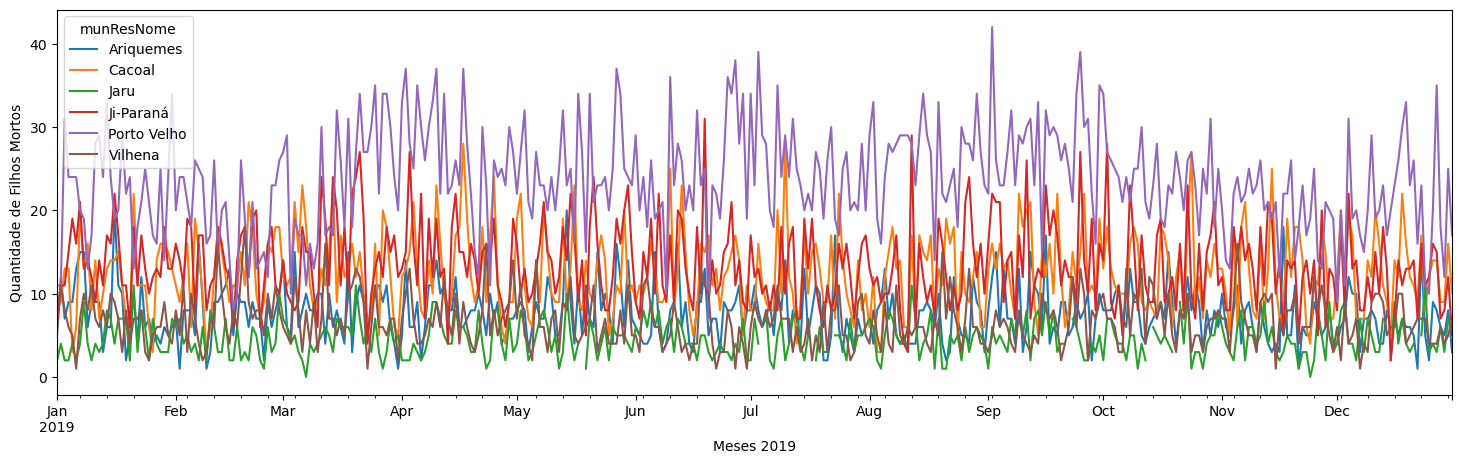

In [19]:
sinasc_raw1.groupby(['DTNASC', imediatas])['QTDFILMORT'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Mortos');
plt.xlabel('Meses 2019');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
IDH_M = {
  "Porto Velho": "IDH-M Alto",
  "Vilhena": "IDH-M Alto",
  "Cacoal": "IDH-M Alto",
  "Ji-Paraná": "IDH-M Alto",
  "Pimenta Bueno": "IDH-M Alto",
  "Ariquemes": "IDH-M Alto",
  "Rolim de Moura": "IDH-M Alto",
  "Cerejeiras": "IDH-M Médio",
  "Jaru": "IDH-M Médio",
  "Colorado do Oeste": "IDH-M Médio",
  "Ouro Preto do Oeste":"IDH-M Médio",
  "Espigão d'Oeste": "IDH-M Médio",
  "Santa Luzia d'Oeste": "IDH-M Médio",
  "Pimenteiras do Oeste": "IDH-M Médio",
  "Presidente Médici": "IDH-M Médio",
  "Castanheiras": "IDH-M Médio",
  "Guajará-Mirim": "IDH-M Médio",
  "Chupinguaia": "IDH-M Médio",
  "Cabixi": "IDH-M Médio",
  "Candeias do Jamari": "IDH-M Médio",
  "São Felipe d'Oeste": "IDH-M Médio",
  "Cacaulândia": "IDH-M Médio",
  "São Miguel do Guaporé": "IDH-M Médio",
  "Mirante da Serra": "IDH-M Médio",
  "Alvorada d'Oeste": "IDH-M Médio",
  "Teixeirópolis": "IDH-M Médio",
  "Nova Brasilândia d'Oeste": "IDH-M Médio",
  "Rio Crespo": "IDH-M Médio",
  "Primavera de Rondônia": "IDH-M Médio",
  "Alta Floresta d'Oeste": "IDH-M Médio",
  "Ministro Andreazza": "IDH-M Médio",
  "Novo Horizonte do Oeste": "IDH-M Médio",
  "Vale do Paraíso": "IDH-M Médio",
  "Alto Paraíso": "IDH-M Médio",
  "Parecis": "IDH-M Médio",
  "Buritis": "IDH-M Médio",
  "Itapuã do Oeste": "IDH-M Médio",
  "Corumbiara": "IDH-M Médio",
  "Cujubim": "IDH-M Médio",
  "Costa Marques": "IDH-M Médio",
  "São Francisco do Guaporé": "IDH-M Médio",
  "Urupá": "IDH-M Médio",
  "Monte Negro": "IDH-M Médio",
  "Seringueiras": "IDH-M Baixo",
  "Governador Jorge Teixeira": "IDH-M Baixo",
  "Machadinho d'Oeste": "IDH-M Baixo",
  "Campo Novo de Rondônia": "IDH-M Baixo",
  "Alto Alegre dos Parecis": "IDH-M Baixo",
  "Theobroma": "IDH-M Baixo",
  "Nova União": "IDH-M Baixo",
  "Nova Mamoré": "IDH-M Baixo",
  "Vale do Anari": "IDH-M Baixo"
}

In [21]:
sinasc_raw1.groupby(IDH_M).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
IDH-M Alto,16855,16799,16855,16855,16855,16646,16632,15110,15695,15428,...,16855,16855,16855,16855,16855,16855,16855,16855,16855,16855
IDH-M Baixo,1326,1315,1326,1326,1326,1312,1313,1200,1244,1207,...,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326
IDH-M Médio,6910,6867,6910,6910,6910,6844,6853,6180,6605,6399,...,6910,6910,6910,6910,6910,6910,6910,6910,6910,6910


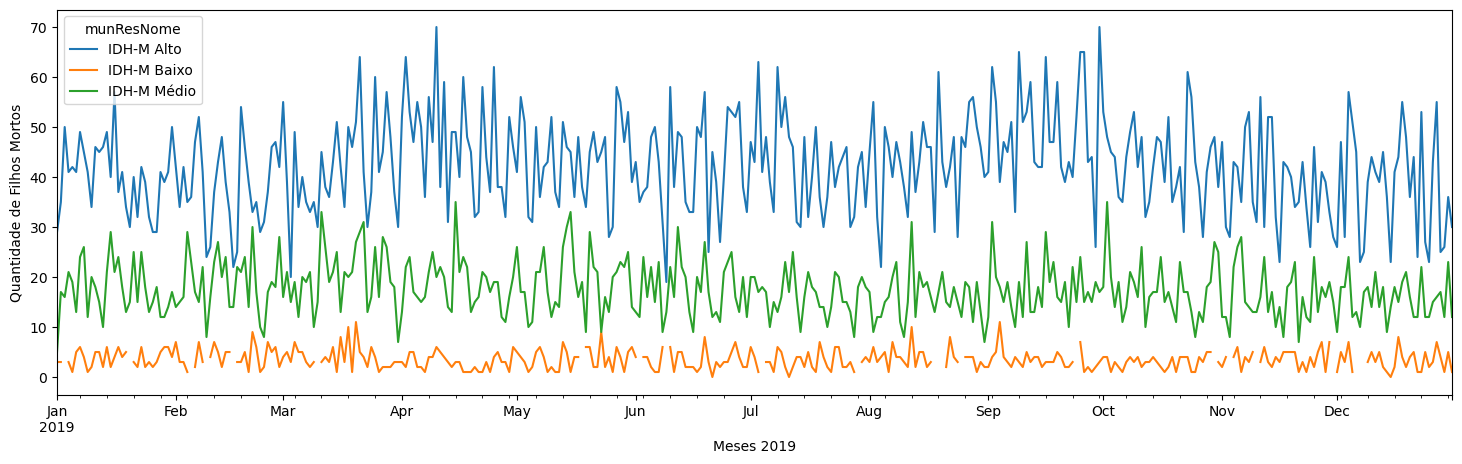

In [22]:
sinasc_raw1.groupby(['DTNASC', IDH_M])['QTDFILMORT'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Mortos');
plt.xlabel('Meses 2019');

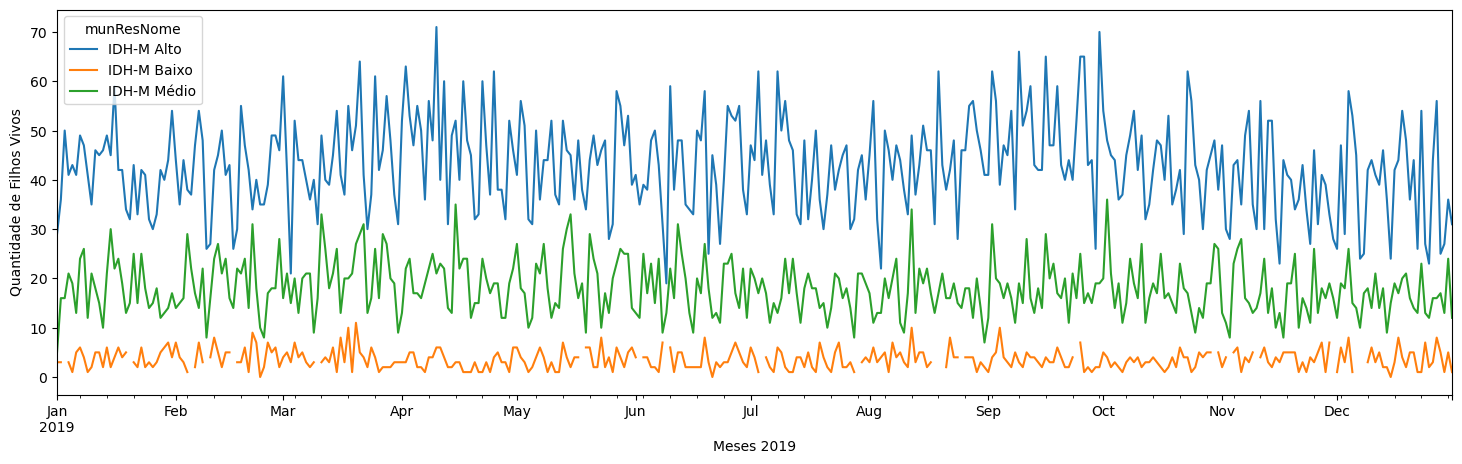

In [31]:
sinasc_raw1.groupby(['DTNASC', IDH_M])['QTDFILVIVO'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Vivos');
plt.xlabel('Meses 2019');

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [23]:
IFDM = {
  'Ariquemes': 'Desenvolvimento Moderado',
  'Vilhena': 'Desenvolvimento Moderado', 
  'Pimenta Bueno': 'Desenvolvimento Moderado', 
  'Porto Velho': 'Desenvolvimento Moderado',
  'Ji-Paraná': 'Desenvolvimento Moderado',
  'Cacoal': 'Desenvolvimento Moderado',
  "Santa Luzia d'Oeste": "Desenvolvimento Moderado",
  'Rolim de Moura': 'Desenvolvimento Moderado',
  'Chupinguaia': 'Desenvolvimento Moderado',
  'São Miguel do Guaporé': 'Desenvolvimento Moderado',
  'Pimenteiras do Oeste': 'Desenvolvimento Moderado',
  'Teixeirópolis': 'Desenvolvimento Moderado',
  'Colorado do Oeste': 'Desenvolvimento Moderado',
  'Jaru': 'Desenvolvimento Moderado',
  'Rio Crespo': 'Desenvolvimento Moderado',
  'Primavera de Rondônia': 'Desenvolvimento Moderado',
  "Alta Floresta d'Oeste": "Desenvolvimento Moderado",
  'Ouro Preto do Oeste': 'Desenvolvimento Moderado',
  'São Francisco do Guaporé': 'Desenvolvimento Moderado',
  'Candeias do Jamari': 'Desenvolvimento Moderado',
  'Buritis': 'Desenvolvimento Moderado',
  "São Felipe d'Oeste": "Desenvolvimento Moderado",
  'Presidente Médici': 'Desenvolvimento Moderado',
  'Cerejeiras': 'Desenvolvimento Moderado',
  'Monte Negro': 'Desenvolvimento Moderado',
  'Urupá': 'Desenvolvimento Moderado',
  "Espigão d'Oeste": "Desenvolvimento regular",
  'Seringueiras': 'Desenvolvimento regular',
  "Alvorada d'Oeste": "Desenvolvimento regular",
  'Itapuã do Oeste': 'Desenvolvimento regular',
  'Cabixi': 'Desenvolvimento regular',
  'Novo Horizonte do Oeste': 'Desenvolvimento regular',
  "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
  "Vale do Paraíso": "Desenvolvimento regular",
  "Corumbiara": "Desenvolvimento regular",
  "Alto Paraíso": "Desenvolvimento regular",
  "Cacaulândia": "Desenvolvimento regular",
  "Vale do Anari": "Desenvolvimento regular",
  "Ministro Andreazza": "Desenvolvimento regular",
  "Costa Marques": "Desenvolvimento regular",
  "Nova União": "Desenvolvimento regular",
  "Guajará-Mirim": "Desenvolvimento regular",
  "Mirante da Serra": "Desenvolvimento regular",
  "Parecis": "Desenvolvimento regular",
  "Castanheiras": "Desenvolvimento regular",
  "Theobroma": "Desenvolvimento regular",
  "Machadinho d'Oeste": "Desenvolvimento regular",
  "Campo Novo de Rondônia": "Desenvolvimento regular",
  "Nova Mamoré": "Desenvolvimento regular",
  "Cujubim": "Desenvolvimento regular",
  "Alto Alegre dos Parecis": "Desenvolvimento regular",
  "Governador Jorge Teixeira": "Desenvolvimento regular" 
}

In [24]:
sinasc_raw1.groupby(IFDM).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Desenvolvimento Moderado,21426,21352,21426,21426,21426,21178,21161,19196,20000,19543,...,21426,21426,21426,21426,21426,21426,21426,21426,21426,21426
Desenvolvimento regular,3665,3629,3665,3665,3665,3624,3637,3294,3544,3491,...,3665,3665,3665,3665,3665,3665,3665,3665,3665,3665


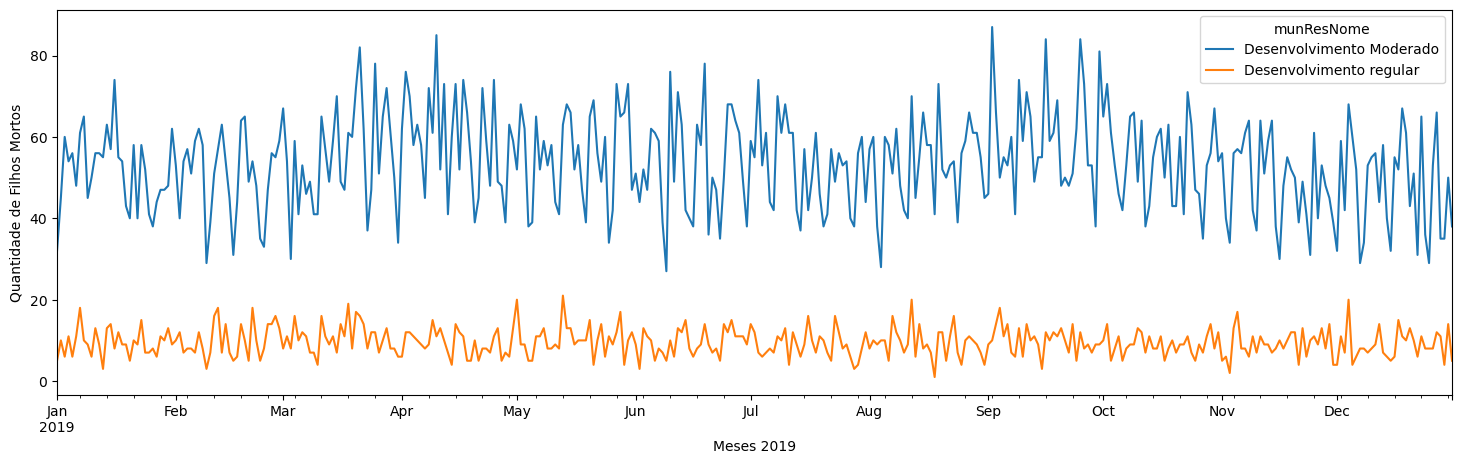

In [25]:
sinasc_raw1.groupby(['DTNASC', IFDM])['QTDFILMORT'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Mortos');
plt.xlabel('Meses 2019');

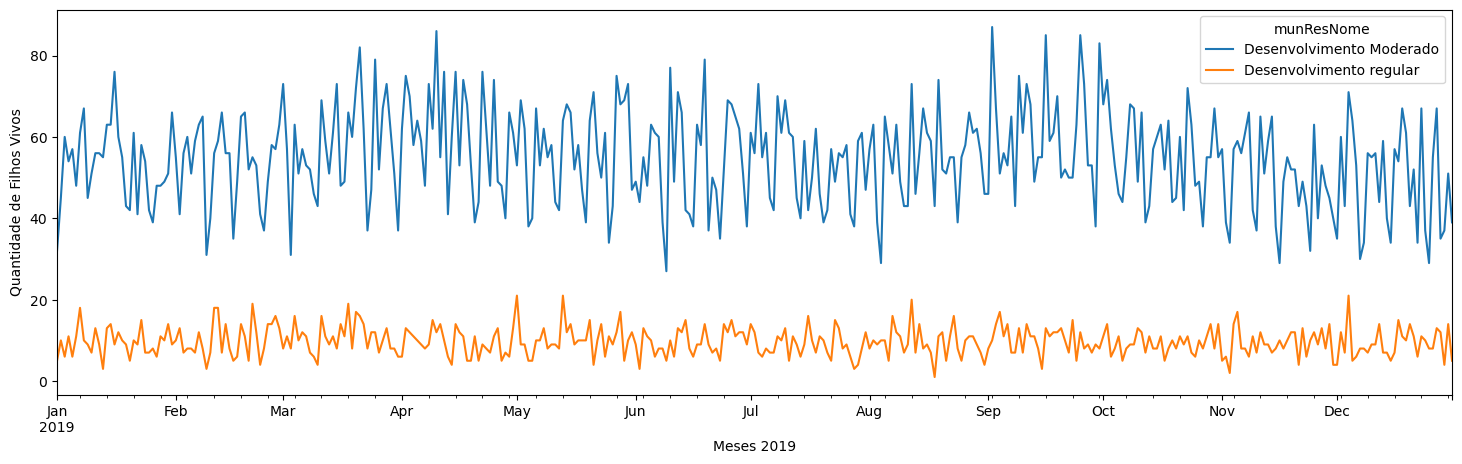

In [32]:
sinasc_raw1.groupby(['DTNASC', IFDM])['QTDFILVIVO'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Vivos');
plt.xlabel('Meses 2019');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [27]:
PIB = {
  "Porto Velho": "Acima de 1 bilhão",
  "Ji-Paraná": "Acima de 1 bilhão",
  "Vilhena": "Acima de 1 bilhão",
  "Ariquemes": "Acima de 1 bilhão",
  "Cacoal": "Acima de 1 bilhão",
  "Jaru": "Acima de 1 bilhão",
  "Rolim de Moura": "Acima de 1 bilhão",
  "Pimenta Bueno": "Acima de 1 bilhão",
  "Guajará-Mirim": "Acima de 500 milhões",
  "Ouro Preto do Oeste": "Acima de 500 milhões",
  "Buritis": "Acima de 500 milhões",
  "Machadinho do Oeste": "Acima de 500 milhões",
  "Espigão d'Oeste": "Acima de 500 milhões",
  "São Miguel do Guaporé": "Acima de 500 milhões",
  "Candeias do Jamari": "Acima de 500 milhões",
  "Nova Mamoré": "Acima de 500 milhões", 
  "Cerejeiras": "Acima de 500 milhões",
  "Alta Floresta do Oeste": "Acima de 300 milhões",
  "Presidente Médici": "Acima de 300 milhões",
  "Cujubim": "Acima de 300 milhões",
  "Nova Brasilândia do Oeste": "Acima de 300 milhões",
  "Alto Paraíso": "Acima de 300 milhões",
  "São Francisco do Guaporé": "Acima de 300 milhões",
  "Colorado do Oeste": "Acima de 300 milhões",
  "Monte Negro": "Acima de 200 milhões",
  "Alto Alegre dos Parecis": "Acima de 200 milhões",
  "Campo Novo de Rondônia": "Acima de 200 milhões",
  "Alvorada do Oeste": "Acima de 200 milhões",
  "Chupinguaia": "Acima de 100 milhões",
  "Corumbiara": "Acima de 100 milhões",
  "Ministro Andreazza": "Acima de 100 milhões",
  "Urupá": "Acima de 100 milhões",
  "Costa Marques": "Acima de 100 milhões",
  "Seringueiras": "Acima de 100 milhões",
  "Mirante da Serra": "Acima de 100 milhões",
  "Governador Jorge Teixeira": "Acima de 100 milhões",
  "Theobroma": "Acima de 100 milhões",
  "Santa Luzia do Oeste": "Acima de 100 milhões",
  "Novo Horizonte do Oeste": "Acima de 100 milhões",
  "Itapuã do Oeste": "Acima de 100 milhões",
  "Vale do Paraíso": "Acima de 100 milhões",
  "Cacaulândia": "Acima de 100 milhões",
  "Cabixi": "Acima de 100 milhões",
  "Vale do Anari": "Acima de 100 milhões",
  "Nova União": "Até 100 milhões",
  "Parecis": "Até 100 milhões",
  "Rio Crespo": "Até 100 milhões",
  "Pimenteiras do Oeste": "Até 100 milhões",
  "Teixeirópolis": "Até 100 milhões",
  "São Felipe do Oeste": "Até 100 milhões",
  "Castanheiras": "Até 100 milhões",
  "Primavera de Rondônia": "Até 100 milhões"    
}

In [29]:
sinasc_raw1.groupby(PIB).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Acima de 1 bilhão,17736,17678,17736,17736,17736,17520,17508,15942,16569,16301,...,17736,17736,17736,17736,17736,17736,17736,17736,17736,17736
Acima de 100 milhões,1853,1844,1853,1853,1853,1829,1836,1642,1823,1818,...,1853,1853,1853,1853,1853,1853,1853,1853,1853,1853
Acima de 200 milhões,519,517,519,519,519,509,503,496,475,447,...,519,519,519,519,519,519,519,519,519,519
Acima de 300 milhões,1252,1248,1252,1252,1252,1239,1243,1154,1240,1231,...,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252
Acima de 500 milhões,3354,3318,3354,3354,3354,3333,3333,2946,3065,2866,...,3354,3354,3354,3354,3354,3354,3354,3354,3354,3354
Até 100 milhões,377,376,377,377,377,372,375,310,372,371,...,377,377,377,377,377,377,377,377,377,377


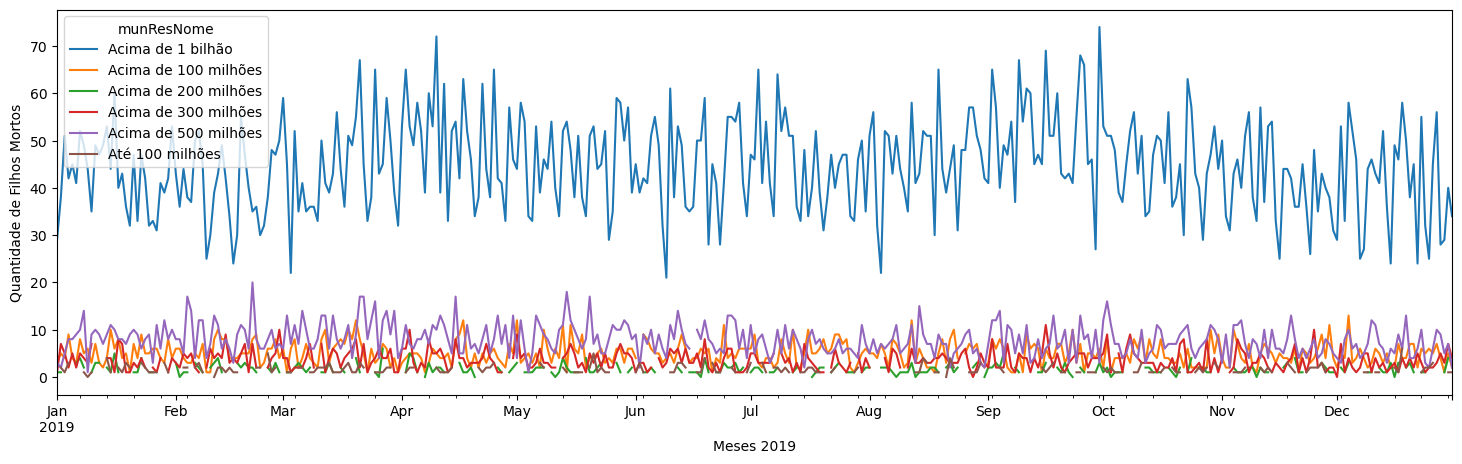

In [30]:
sinasc_raw1.groupby(['DTNASC', PIB])['QTDFILMORT'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Mortos');
plt.xlabel('Meses 2019');

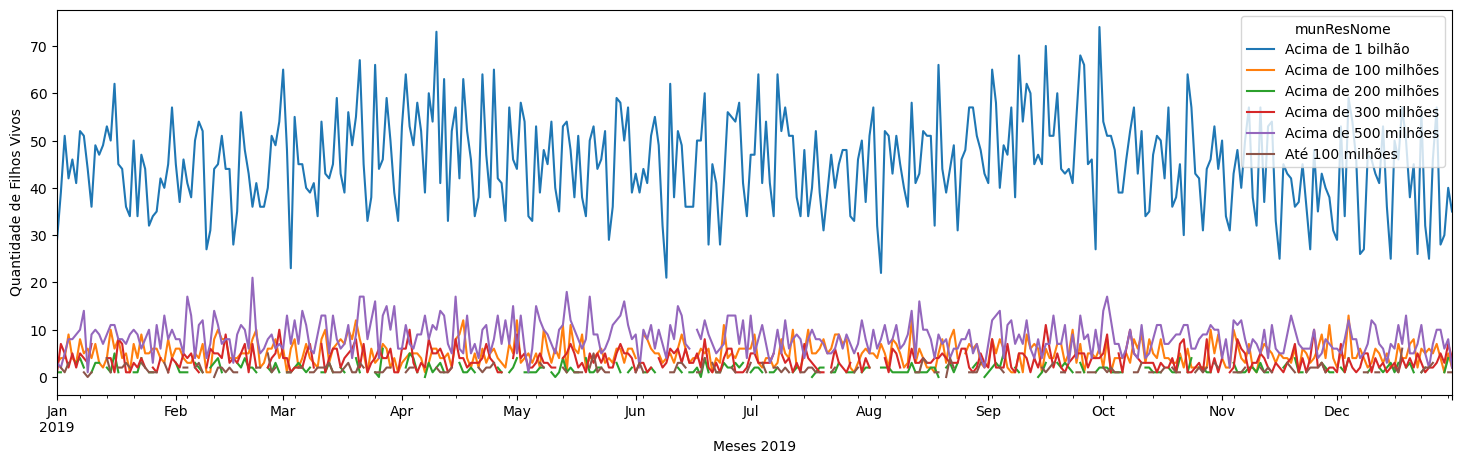

In [33]:
sinasc_raw1.groupby(['DTNASC', PIB])['QTDFILVIVO'].count().unstack().plot(figsize=[18,5]);
plt.ylabel('Quantidade de Filhos Vivos');
plt.xlabel('Meses 2019');

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Nos casos acima foram comparados a quantidade de filhos vivos e a quantidade de filhos mortos de cada grupamento, e é possível constatar que tanto os locais com maiores índices de desenvolvimento humano, pib e idh, apresentam os maiores números de filhos vivos e mortos, o que está ligado as populações desses locais que são de fato as maiores.